In [1]:
# Import Packages
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [3]:
# Import local model files
from FBRN.myfunc import Physics
from FBRN.myfunc import MyMatmul
from FBRN.main import FBRestNet
from FBRN.model import MyModel
from FBRN.myfunc import Export_hyper

In [4]:
# Import the fourier method
from scripts.fouriermethod import Fourier_solver
from scripts.lowessmethod import LowessSolver

# Define the four model variations

In [5]:
model_1_cube = FBRestNet(
    model_id = 'model_1_cube_',
    dataset_folder = '../Datasets/',
    model_folder = '../outputs/models/',
    opt_hist_folder = '../outputs/opt_hist/',
    experimentation=Physics(2000,50,1,1),
    nb_blocks=20,
    im_set="Set1",
    noise = 0.05,        
    constraint = 'cube',  
    train_size=400,
    val_size=200,
    batch_size=64,
    lr=0.1, 
    nb_epochs=130,
    freq_val=1,
    loss_elt=True,
    save_signals=False,
    save_outputs=True,
    save_model=True,
    save_hist=True
    )

In [6]:
model_1_slab = FBRestNet(
    model_id = 'model_1_slab_',
    dataset_folder = '../Datasets/',
    model_folder = '../outputs/models/',
    opt_hist_folder = '../outputs/opt_hist/',
    experimentation=Physics(2000,50,1,1),
    nb_blocks=20,
    im_set="Set1",
    noise = 0.05,        
    constraint = 'slab',  
    train_size=400,
    val_size=200,
    batch_size=64,
    lr=0.1, 
    nb_epochs=10,
    freq_val=1,
    loss_elt=True,
    save_signals=False,
    save_outputs=True,
    save_model=True,
    save_hist=True
    )

In [7]:
model_05_cube = FBRestNet(
    model_id = 'model_05_cube_',
    dataset_folder = '../Datasets/',
    model_folder = '../outputs/models/',
    opt_hist_folder = '../outputs/opt_hist/',
    experimentation=Physics(2000,50,1/2,1),
    nb_blocks=20,
    im_set="Set1",
    noise = 0.05,        
    constraint = 'cube',  
    train_size=400,
    val_size=200,
    batch_size=64,
    lr=0.1, 
    nb_epochs=130,
    freq_val=1,
    loss_elt=True,
    save_signals=False,
    save_outputs=True,
    save_model=True,
    save_hist=True
    )

In [8]:
model_05_slab = FBRestNet(
    model_id = 'model_05_slab_',
    dataset_folder = '../Datasets/',
    model_folder = '../outputs/models/',
    opt_hist_folder = '../outputs/opt_hist/',
    experimentation=Physics(2000,50,1/2,1),
    nb_blocks=20,
    im_set="Set1",
    noise = 0.05,        
    constraint = 'slab',  
    train_size=400,
    val_size=200,
    batch_size=64,
    lr=0.1, 
    nb_epochs=130,
    freq_val=1,
    loss_elt=True,
    save_signals=False,
    save_outputs=True,
    save_model=True,
    save_hist=True
    )

# Create dataset

In [9]:
generator=torch.Generator()
generator.manual_seed(42)
train_set_1_cube, val_set_1_cube = model_1_cube.CreateDataSet(generator)
generator.manual_seed(42)
train_set_1_slab, val_set_1_slab = model_1_slab.CreateDataSet(generator)
generator.manual_seed(42)
train_set_05_cube, val_set_05_cube = model_05_cube.CreateDataSet(generator)
generator.manual_seed(42)
train_set_05_slab, val_set_05_slab = model_05_slab.CreateDataSet(generator)

# Load pretrained models

In [10]:
pretrained = True
if pretrained:
    model_1_cube.model.load_state_dict(torch.load(model_1_cube.model_folder+model_1_cube.model_id+'weights.pt', map_location=torch.device('cpu')))
    model_1_slab.model.load_state_dict(torch.load(model_1_slab.model_folder+model_1_slab.model_id+'weights.pt', map_location=torch.device('cpu')))
    model_05_cube.model.load_state_dict(torch.load(model_05_cube.model_folder+model_05_cube.model_id+'weights.pt', map_location=torch.device('cpu')))
    model_05_slab.model.load_state_dict(torch.load(model_05_slab.model_folder+model_05_slab.model_id+'weights.pt', map_location=torch.device('cpu')))
else:
    model_1_cube.train(train_set_1_cube, val_set_1_cube)
    model_1_slab.train(train_set_1_slab, val_set_1_slab)
    model_05_cube.train(train_set_05_cube, val_set_05_cube)
    model_05_slab.train(train_set_05_slab, val_set_05_slab)


# Test on gaussian functions

In [11]:
t_1c, gauss_1c, pred_gauss_1c = model_1_cube.test_gauss(model_1_cube.noise, plot_opt=False)
t_1s, gauss_1s, pred_gauss_1s = model_1_slab.test_gauss(model_1_slab.noise, plot_opt=False)
t_05c, gauss_05c, pred_gauss_05c = model_05_cube.test_gauss(model_05_cube.noise, plot_opt=False)
t_05s, gauss_05s, pred_gauss_05s = model_05_slab.test_gauss(model_05_slab.noise, plot_opt=False)

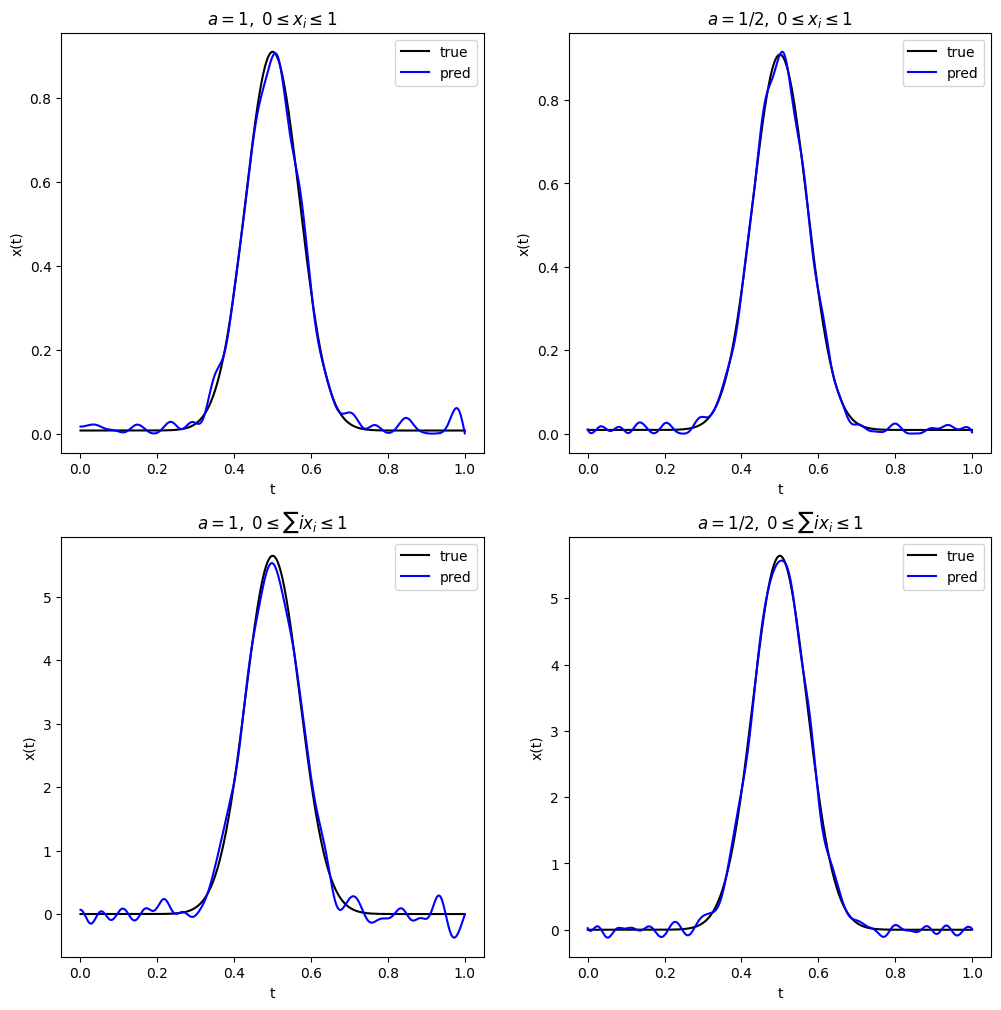

In [12]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

ax[0][0].plot(t_1c,gauss_1c, c='k', label='true')
ax[0][0].plot(t_1c,pred_gauss_1c,c='b', label='pred')
ax[0][0].set_xlabel('t')
ax[0][0].set_ylabel('x(t)')
ax[0][0].set_title(r'$a=1, \; 0 \leq x_i \leq 1$')
ax[0][0].legend()

ax[0][1].plot(t_05c,gauss_05c, c='k', label='true')
ax[0][1].plot(t_05c,pred_gauss_05c,c='b', label='pred')
ax[0][1].set_xlabel('t')
ax[0][1].set_ylabel('x(t)')
ax[0][1].set_title(r'$a=1/2, \; 0 \leq x_i \leq 1$')
ax[0][1].legend()

ax[1][0].plot(t_1s,gauss_1s, c='k', label='true')
ax[1][0].plot(t_1s,pred_gauss_1s,c='b', label='pred')
ax[1][0].set_xlabel('t')
ax[1][0].set_ylabel('x(t)')
ax[1][0].set_title(r'$a=1, \; 0 \leq \sum i x_i \leq 1$')
ax[1][0].legend()

ax[1][1].plot(t_05s,gauss_05s, c='k', label='true')
ax[1][1].plot(t_05s,pred_gauss_05s,c='b', label='pred')
ax[1][1].set_xlabel('t')
ax[1][1].set_ylabel('x(t)')
ax[1][1].set_title(r'$a=1/2, \; 0 \leq \sum i x_i \leq 1$')
ax[1][1].legend()

plt.savefig('../Figures/Figure_7.pdf')
plt.show()


# Test on some examples

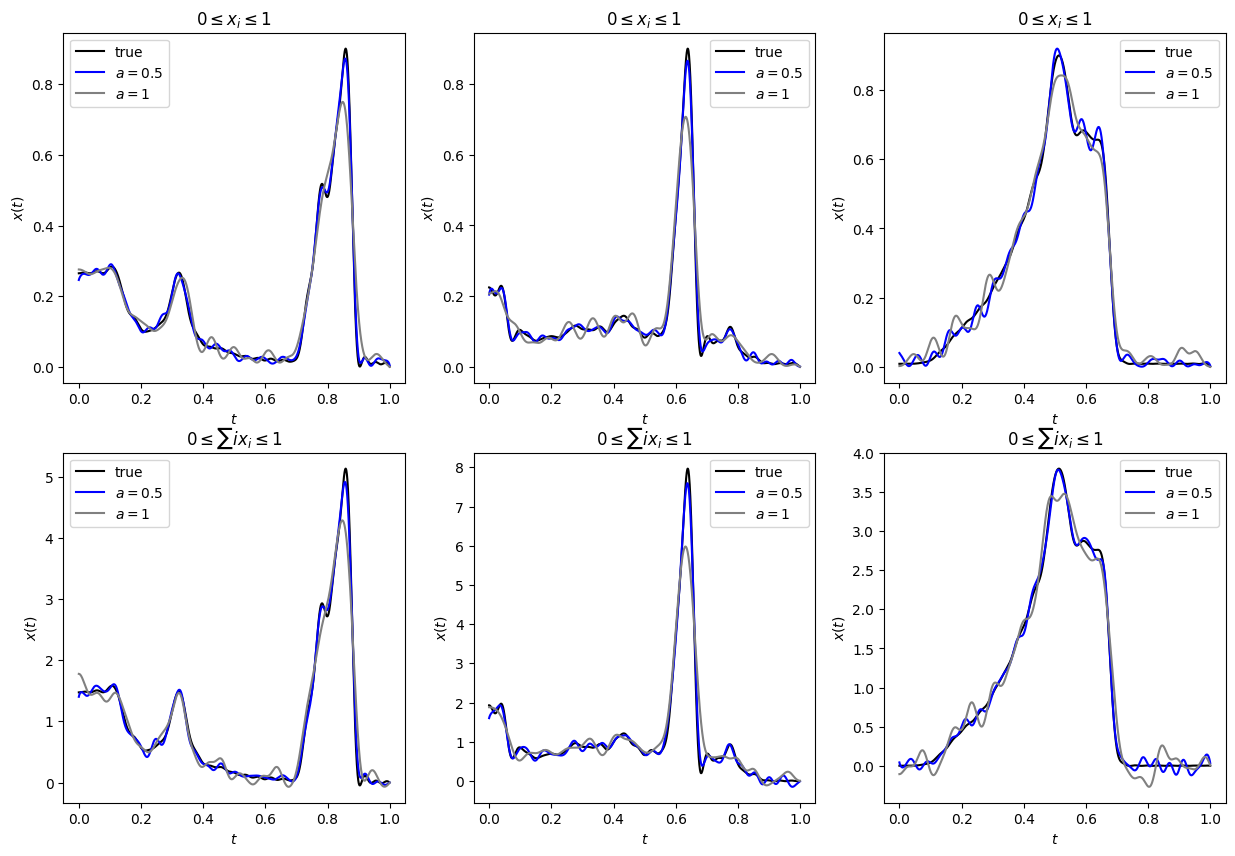

In [13]:
t = np.linspace(0,1,model_1_cube.physics.nx, endpoint=False)
fig, ax = plt.subplots(2,3,figsize=(15,10))

example_idx = [12,35,66]

for i, example in enumerate(example_idx):

    _, signals_1_cube = model_1_cube.test(val_set_1_cube,plot_opt=False, idx=example)
    _, signals_1_slab = model_1_slab.test(val_set_1_slab,plot_opt=False, idx=example)
    _, signals_05_cube = model_05_cube.test(val_set_05_cube,plot_opt=False, idx=example)
    _, signals_05_slab = model_05_slab.test(val_set_05_slab,plot_opt=False, idx=example)

    ax[0][i].plot(t, signals_1_cube['x_elt_true'],c='k', label='true')
    ax[0][i].plot(t, signals_05_cube['x_elt_pred'],c='b', label='$a=0.5$')
    ax[0][i].plot(t, signals_1_cube['x_elt_pred'],c='gray', label='$a=1$')
    ax[0][i].set_xlabel('$t$')
    ax[0][i].set_ylabel('$x(t)$')
    ax[0][i].set_title('$0 \leq x_i \leq 1$')
    ax[0][i].legend()

    ax[1][i].plot(t, signals_1_slab['x_elt_true'],c='k', label='true')
    ax[1][i].plot(t, signals_05_slab['x_elt_pred'],c='b', label='$a=0.5$')
    ax[1][i].plot(t, signals_1_slab['x_elt_pred'],c='gray', label='$a=1$')
    ax[1][i].set_xlabel('$t$')
    ax[1][i].set_ylabel('$x(t)$')
    ax[1][i].set_title('$0 \leq \sum i x_i \leq 1$')
    ax[1][i].legend()

plt.savefig('../Figures/Figure_8.pdf')
plt.show()

# Model parameters

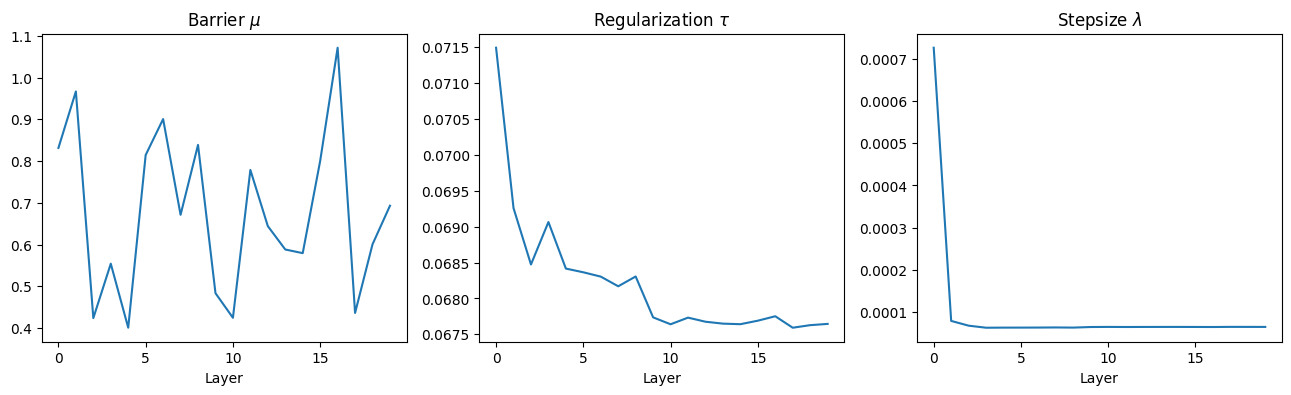

In [14]:
mu_vec = [np.squeeze(model_1_cube.model.Layers[layer_id].mu).item() for layer_id in range(20)]
tau_vec = [np.squeeze(model_1_cube.model.Layers[layer_id].gamma_reg[1]).item() for layer_id in range(20)]
lambda_vec = [np.squeeze(model_1_cube.model.Layers[layer_id].gamma_reg[0]).item() for layer_id in range(20)]

im, ax = plt.subplots(1,3, figsize=(16,4))

ax[0].plot(mu_vec)
ax[0].set_xlabel('Layer')
ax[0].set_title(r'Barrier $\mu$')

ax[1].plot(tau_vec)
ax[1].set_xlabel('Layer')
ax[1].set_title(r'Regularization $\tau$')

ax[2].plot(lambda_vec)
ax[2].set_xlabel('Layer')
ax[2].set_title(r'Stepsize $\lambda$')

plt.savefig('../Figures/Figure_9.pdf')
plt.show()

In [15]:
opt_hist = np.load('../outputs/opt_hist/model_1_cube_opt_hist.npy', allow_pickle=True)[()]
hyper_params = opt_hist['fb_params']

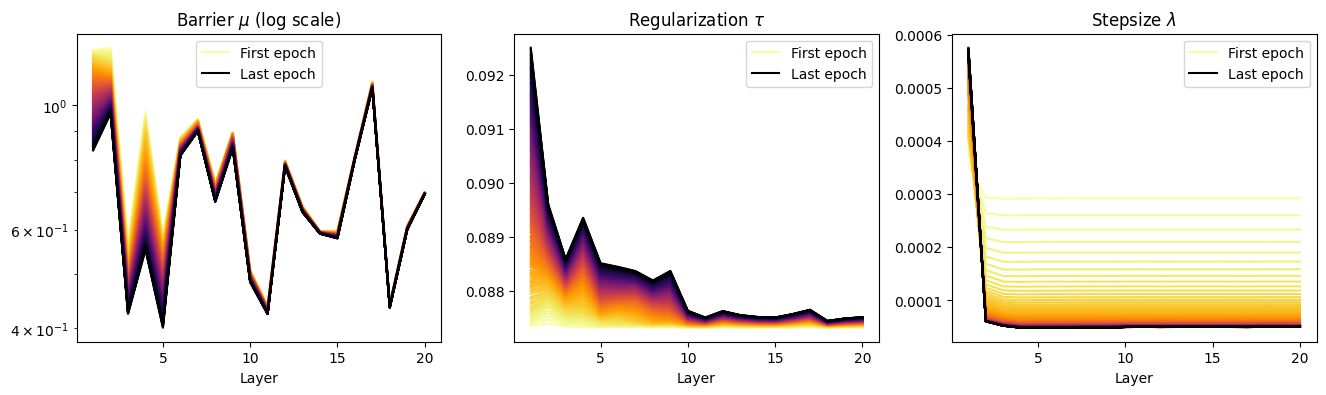

In [16]:
im, ax = plt.subplots(1,3, figsize=(16,4))
for i in range(model_1_cube.nb_epochs):

    ax[0].plot(np.arange(1, model_1_cube.nb_blocks+1),hyper_params[i,0], color=sns.color_palette('inferno',n_colors=model_1_cube.nb_epochs)[model_1_cube.nb_epochs-i-1],
        label='First epoch' if i==0 else 'Last epoch' if i==(model_1_cube.nb_epochs-1) else '_hide')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('Layer')
    ax[0].set_title(r'Barrier $\mu$ (log scale)')

    ax[1].plot(np.arange(1, model_1_cube.nb_blocks+1),hyper_params[i,1], color=sns.color_palette('inferno',n_colors=model_1_cube.nb_epochs)[model_1_cube.nb_epochs-i-1],
        label='First epoch' if i==0 else 'Last epoch' if i==(model_1_cube.nb_epochs-1) else '_hide')
    ax[1].set_xlabel('Layer')
    ax[1].set_title(r'Regularization $\tau$')

    ax[2].plot(np.arange(1, model_1_cube.nb_blocks+1),hyper_params[i,2], color=sns.color_palette('inferno',n_colors=model_1_cube.nb_epochs)[model_1_cube.nb_epochs-i-1],
        label='First epoch' if i==0 else 'Last epoch' if i==(model_1_cube.nb_epochs-1) else '_hide')
    ax[2].set_xlabel('Layer')
    ax[2].set_title(r'Stepsize $\lambda$')

for i in range(3): ax[i].legend()

plt.savefig('../Figures/Figure_9bis.pdf')
plt.show()

# Lipschitz constants

In [17]:
print('a=1,   0<x_i<1')
print(model_1_cube.model.Lipschitz(opt1="semi",opt2="entree11"))
print(model_1_cube.model.Lipschitz(opt1="semi",opt2="entree01"))
print()
print('a=1/2,   0<x_i<1')
print(model_05_cube.model.Lipschitz(opt1="semi",opt2="entree11"))
print(model_05_cube.model.Lipschitz(opt1="semi",opt2="entree01"))
print()
print('a=1,   0< \sum ix_i <1')
print(model_1_slab.model.Lipschitz(opt1="semi",opt2="entree11"))
print(model_1_slab.model.Lipschitz(opt1="semi",opt2="entree01"))
print()
print('a=1/2,   0< \sum ix_i <1')
print(model_05_slab.model.Lipschitz(opt1="semi",opt2="entree11"))
print(model_05_slab.model.Lipschitz(opt1="semi",opt2="entree01"))

a=1,   0<x_i<1
0.04925862181583183
9.657855730047092e-05

a=1/2,   0<x_i<1
0.0492524786641414
6.272939599926956e-05

a=1,   0< \sum ix_i <1
0.04920250575592966
6.468980362259611e-05

a=1/2,   0< \sum ix_i <1
0.04925079819213239
6.700333412826731e-05


## Table 1

In [39]:
print('  a=1         a=1/2         a=1             a=1/2')
print('0<x_i<1      0<x_i<1  0< \sum ix_i <1   0< \sum ix_i <1')
print('{:.2e}'.format(model_1_cube.model.Lipschitz(opt1="semi",opt2="entree11")),
    '   {:.2e}'.format(model_05_cube.model.Lipschitz(opt1="semi",opt2="entree11")),
    '    {:.2e}'.format(model_1_slab.model.Lipschitz(opt1="semi",opt2="entree11")),
    '         {:.2e}'.format(model_05_slab.model.Lipschitz(opt1="semi",opt2="entree11")))
print('{:.2e}'.format(model_1_cube.model.Lipschitz(opt1="semi",opt2="entree01")),
    '   {:.2e}'.format(model_05_cube.model.Lipschitz(opt1="semi",opt2="entree01")),
    '    {:.2e}'.format(model_1_slab.model.Lipschitz(opt1="semi",opt2="entree01")),
    '         {:.2e}'.format(model_05_slab.model.Lipschitz(opt1="semi",opt2="entree01")))


  a=1         a=1/2         a=1             a=1/2
0<x_i<1      0<x_i<1  0< \sum ix_i <1   0< \sum ix_i <1
4.93e-02    4.93e-02     4.92e-02          4.93e-02
9.66e-05    6.27e-05     6.47e-05          6.70e-05


# Table 2: errors

In [18]:
opt_hist_1_cube_s001 = np.load('../outputs/opt_hist/model_1_cube_sigma_001_opt_hist.npy', allow_pickle=True)[()]
opt_hist_1_cube_s005 = np.load('../outputs/opt_hist/model_1_cube_opt_hist.npy', allow_pickle=True)[()]
opt_hist_1_cube_s010 = np.load('../outputs/opt_hist/model_1_cube_sigma_01_opt_hist.npy', allow_pickle=True)[()]
opt_hist_1_cube_s050 = np.load('../outputs/opt_hist/model_1_cube_sigma_05_opt_hist.npy', allow_pickle=True)[()]

opt_hist_05_cube_s001 = np.load('../outputs/opt_hist/model_05_cube_sigma_001_opt_hist.npy', allow_pickle=True)[()]
opt_hist_05_cube_s005 = np.load('../outputs/opt_hist/model_05_cube_opt_hist.npy', allow_pickle=True)[()]
opt_hist_05_cube_s010 = np.load('../outputs/opt_hist/model_05_cube_sigma_01_opt_hist.npy', allow_pickle=True)[()]
opt_hist_05_cube_s050 = np.load('../outputs/opt_hist/model_05_cube_sigma_05_opt_hist.npy', allow_pickle=True)[()]

opt_hist_1_slab_s001 = np.load('../outputs/opt_hist/model_1_slab_sigma_001_opt_hist.npy', allow_pickle=True)[()]
opt_hist_1_slab_s005 = np.load('../outputs/opt_hist/model_1_slab_opt_hist.npy', allow_pickle=True)[()]
opt_hist_1_slab_s010 = np.load('../outputs/opt_hist/model_1_slab_sigma_01_opt_hist.npy', allow_pickle=True)[()]
opt_hist_1_slab_s050 = np.load('../outputs/opt_hist/model_1_slab_sigma_05_opt_hist.npy', allow_pickle=True)[()]

opt_hist_05_slab_s001 = np.load('../outputs/opt_hist/model_05_slab_sigma_001_opt_hist.npy', allow_pickle=True)[()]
opt_hist_05_slab_s005 = np.load('../outputs/opt_hist/model_05_slab_opt_hist.npy', allow_pickle=True)[()]
opt_hist_05_slab_s010 = np.load('../outputs/opt_hist/model_05_slab_sigma_01_opt_hist.npy', allow_pickle=True)[()]
opt_hist_05_slab_s050 = np.load('../outputs/opt_hist/model_05_slab_sigma_05_opt_hist.npy', allow_pickle=True)[()]


In [19]:

print('Model predictions\n')
print('           a=1   |  a=1/2')
print('n=0.01  {:.2e}'.format(opt_hist_1_cube_s001['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s001['loss_val'][-1]))
print('n=0.05  {:.2e}'.format(opt_hist_1_cube_s005['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s005['loss_val'][-1]))
print('n=0.1   {:.2e}'.format(opt_hist_1_cube_s010['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s010['loss_val'][-1]))
print('n=0.5   {:.2e}'.format(opt_hist_1_cube_s050['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s050['loss_val'][-1]))
# print()
# print(opt_hist_05_cube_s001['loss_val'][-1])
# print(opt_hist_05_cube_s005['loss_val'][-1])
# print(opt_hist_05_cube_s010['loss_val'][-1])
# print(opt_hist_05_cube_s050['loss_val'][-1])
# print()
# print('a=1/2')
# print(opt_hist_1_slab_s001['loss_val'][-1])
# print(opt_hist_1_slab_s005['loss_val'][-1])
# print(opt_hist_1_slab_s010['loss_val'][-1])
# print(opt_hist_1_slab_s050['loss_val'][-1])
# print()
# print(opt_hist_05_slab_s001['loss_val'][-1])
# print(opt_hist_05_slab_s005['loss_val'][-1])
# print(opt_hist_05_slab_s010['loss_val'][-1])
# print(opt_hist_05_slab_s050['loss_val'][-1])


Model predictions

           a=1   |  a=1/2
n=0.01  3.05e-03 | 3.11e-04
n=0.05  1.55e-02 | 1.78e-03
n=0.1   2.70e-02 | 5.12e-03
n=0.5   4.64e-01 | 2.99e-02


## Fourier method

In [20]:
noise_lvl = [0.01, 0.05, 0.1, 0.5]
f_max_1 = [40/50, 20/50, 15/50, 7/50]
f_max_05 = [50/50, 50/50, 40/50, 15/50]

errors_fourier = np.zeros((len(noise_lvl), 2))

for i,noise in enumerate(noise_lvl):
    # create datasets with different noise levels
    model_1_cube.noise = noise
    generator.manual_seed(42)
    train_set_1_cube, val_set_1_cube = model_1_cube.CreateDataSet(generator)

    model_05_cube.noise = noise
    generator.manual_seed(42)
    train_set_05_cube, val_set_05_cube = model_05_cube.CreateDataSet(generator)

    fourier_filter_1c = Fourier_solver(
        model_1_cube.physics.nx,
        model_1_cube.physics.m,
        model_1_cube.physics.a,
        model_1_cube.physics.p)
    errors_fourier[i,0], _ = fourier_filter_1c.Fourier_filter(val_set_1_cube,f_max_1[i], display=False)

    fourier_filter_05c = Fourier_solver(
        model_05_cube.physics.nx,
        model_05_cube.physics.m,
        model_05_cube.physics.a,
        model_05_cube.physics.p)
    errors_fourier[i,1], _ = fourier_filter_05c.Fourier_filter(val_set_05_cube,f_max_05[i], display=False)


In [21]:
print('Fourier method\n')
print('           a=1   |  a=1/2')
print('n=0.01  {:.2e}'.format(errors_fourier[0,0]),'| {:.2e}'.format(errors_fourier[0,1]))
print('n=0.05  {:.2e}'.format(errors_fourier[1,0]),'| {:.2e}'.format(errors_fourier[1,1]))
print('n=0.1   {:.2e}'.format(errors_fourier[2,0]),'| {:.2e}'.format(errors_fourier[2,1]))
print('n=0.5   {:.2e}'.format(errors_fourier[3,0]),'| {:.2e}'.format(errors_fourier[3,1]))


Fourier method

           a=1   |  a=1/2
n=0.01  4.29e-03 | 9.18e-05
n=0.05  2.25e-02 | 2.28e-03
n=0.1   3.72e-02 | 7.45e-03
n=0.5   1.03e-01 | 4.32e-02


# Time filtering method

In [22]:
noise_lvl = [0.01, 0.05, 0.1, 0.5]

errors_lowess = np.zeros((len(noise_lvl), 2))

for i,noise in enumerate(noise_lvl):
    # create datasets with different noise levels
    model_1_cube.noise = noise
    generator.manual_seed(42)
    train_set_1_cube, val_set_1_cube = model_1_cube.CreateDataSet(generator)

    model_05_cube.noise = noise
    generator.manual_seed(42)
    train_set_05_cube, val_set_05_cube = model_05_cube.CreateDataSet(generator)

    lowess_filter_1c = LowessSolver(
        model_1_cube.physics.nx,
        model_1_cube.physics.m,
        model_1_cube.physics.a,
        model_1_cube.physics.p)
    errors_lowess[i,0], _ = lowess_filter_1c.Lowess_filter(val_set_1_cube,frac=200/2000,it=1,delta=50, project=True, display=False)

    lowess_filter_05c = LowessSolver(
        model_05_cube.physics.nx,
        model_05_cube.physics.m,
        model_05_cube.physics.a,
        model_05_cube.physics.p)
    errors_lowess[i,1], _ = lowess_filter_05c.Lowess_filter(val_set_05_cube,frac=200/2000,it=1,delta=50, project=True, display=False)

In [23]:
print('Lowess method\n')
print('           a=1   |  a=1/2')
print('n=0.01  {:.2e}'.format(errors_lowess[0,0]),'| {:.2e}'.format(errors_lowess[0,1]))
print('n=0.05  {:.2e}'.format(errors_lowess[1,0]),'| {:.2e}'.format(errors_lowess[1,1]))
print('n=0.1   {:.2e}'.format(errors_lowess[2,0]),'| {:.2e}'.format(errors_lowess[2,1]))
print('n=0.5   {:.2e}'.format(errors_lowess[3,0]),'| {:.2e}'.format(errors_lowess[3,1]))

Lowess method

           a=1   |  a=1/2
n=0.01  2.49e-02 | 2.68e-02
n=0.05  2.66e-02 | 2.54e-02
n=0.1   3.96e-02 | 2.52e-02
n=0.5   4.59e-01 | 4.12e-02


# Table 2: Errors

In [30]:
print('           Lowess method          Model predictions       Fourier method')
print('           a=1   |  a=1/2          a=1   |  a=1/2         a=1   |  a=1/2')
print('n=0.01  {:.2e}'.format(errors_lowess[0,0]),'| {:.2e}'.format(errors_lowess[0,1]),
    '    {:.2e}'.format(opt_hist_1_cube_s001['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s001['loss_val'][-1]),
    '    {:.2e}'.format(errors_fourier[0,0]),'| {:.2e}'.format(errors_fourier[0,1]))
print('n=0.05  {:.2e}'.format(errors_lowess[1,0]),'| {:.2e}'.format(errors_lowess[1,1]),
    '    {:.2e}'.format(opt_hist_1_cube_s005['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s005['loss_val'][-1]),
    '    {:.2e}'.format(errors_fourier[1,0]),'| {:.2e}'.format(errors_fourier[1,1]))
print('n=0.1   {:.2e}'.format(errors_lowess[2,0]),'| {:.2e}'.format(errors_lowess[2,1]),
    '    {:.2e}'.format(opt_hist_1_cube_s010['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s010['loss_val'][-1]),
    '    {:.2e}'.format(errors_fourier[2,0]),'| {:.2e}'.format(errors_fourier[2,1]))
print('n=0.5   {:.2e}'.format(errors_lowess[3,0]),'| {:.2e}'.format(errors_lowess[3,1]),
    '    {:.2e}'.format(opt_hist_1_cube_s050['loss_val'][-1]),'| {:.2e}'.format(opt_hist_05_cube_s050['loss_val'][-1]),
    '    {:.2e}'.format(errors_fourier[3,0]),'| {:.2e}'.format(errors_fourier[3,1]))


           Lowess method          Model predictions       Fourier method
           a=1   |  a=1/2          a=1   |  a=1/2         a=1   |  a=1/2
n=0.01  2.49e-02 | 2.68e-02     3.05e-03 | 3.11e-04     4.29e-03 | 9.18e-05
n=0.05  2.66e-02 | 2.54e-02     1.55e-02 | 1.78e-03     2.25e-02 | 2.28e-03
n=0.1   3.96e-02 | 2.52e-02     2.70e-02 | 5.12e-03     3.72e-02 | 7.45e-03
n=0.5   4.59e-01 | 4.12e-02     4.64e-01 | 2.99e-02     1.03e-01 | 4.32e-02
